In [13]:
import os
import wfdb
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SAMPLING_RATE = 125
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'Data')
af_dir = os.path.join(data_dir, 'Af-Data')
sr_dir = os.path.join(data_dir, 'SR-Data')
records = "RECORDS"

In [3]:
files = []
with open(os.path.join(af_dir, records), 'r') as f:
    for line in f:
        files.append(line.strip())

print("Files to be processed:", files)

Files to be processed: ['mimic_perform_af_001', 'mimic_perform_af_002', 'mimic_perform_af_003', 'mimic_perform_af_004', 'mimic_perform_af_005', 'mimic_perform_af_006', 'mimic_perform_af_007', 'mimic_perform_af_008', 'mimic_perform_af_009', 'mimic_perform_af_010', 'mimic_perform_af_011', 'mimic_perform_af_012', 'mimic_perform_af_013', 'mimic_perform_af_014', 'mimic_perform_af_015', 'mimic_perform_af_016', 'mimic_perform_af_017', 'mimic_perform_af_018', 'mimic_perform_af_019']


In [5]:
ppg_idx = None

In [11]:
def is_valid_data(signal):
    return np.any(~np.isnan(signal)) and np.any(np.isinf(signal))

In [15]:
for file in files:
    record = wfdb.rdrecord(os.path.join(af_dir, file))
    p_signal = record.p_signal
    names = record.sig_name
    ppg_idx = 0
    for i, name in enumerate(names):
        if name == 'PPG':
            ppg_idx = i
            break
    ppg_signal = p_signal[:, ppg_idx]
    print(f"Processed file: {file}, PPG signal length: {len(ppg_signal)}")


Processed file: mimic_perform_af_001, PPG signal length: 150001
Processed file: mimic_perform_af_002, PPG signal length: 150001
Processed file: mimic_perform_af_003, PPG signal length: 150001
Processed file: mimic_perform_af_004, PPG signal length: 150001
Processed file: mimic_perform_af_005, PPG signal length: 150001
Processed file: mimic_perform_af_006, PPG signal length: 150001
Processed file: mimic_perform_af_007, PPG signal length: 150001
Processed file: mimic_perform_af_008, PPG signal length: 150001
Processed file: mimic_perform_af_009, PPG signal length: 150001
Processed file: mimic_perform_af_010, PPG signal length: 150001
Processed file: mimic_perform_af_011, PPG signal length: 150001
Processed file: mimic_perform_af_012, PPG signal length: 150001
Processed file: mimic_perform_af_013, PPG signal length: 150001
Processed file: mimic_perform_af_014, PPG signal length: 150001
Processed file: mimic_perform_af_015, PPG signal length: 150001
Processed file: mimic_perform_af_016, PP

In [9]:
print("PPG channel index identified as:", ppg_idx)
file_index = 0
sample_record = wfdb.rdrecord(os.path.join(af_dir, files[file_index])).p_signal[:, ppg_idx]
print("Sample record PPG signal length:", len(sample_record))
print(type(sample_record))

PPG channel index identified as: 0
Sample record PPG signal length: 150001
<class 'numpy.ndarray'>


In [17]:
signals, info = nk.ppg_process(sample_record, sampling_rate=SAMPLING_RATE)
print("PPG processing info:", info)
print("Processed signals keys:", signals.keys())

PPG processing info: {'method_peaks': 'elgendi', 'method_fixpeaks': 'None', 'PPG_Peaks': array([    78,    165,    242, ..., 149771, 149842, 149932], shape=(1811,)), 'sampling_rate': 125}
Processed signals keys: Index(['PPG_Raw', 'PPG_Clean', 'PPG_Rate', 'PPG_Quality', 'PPG_Peaks'], dtype='object')


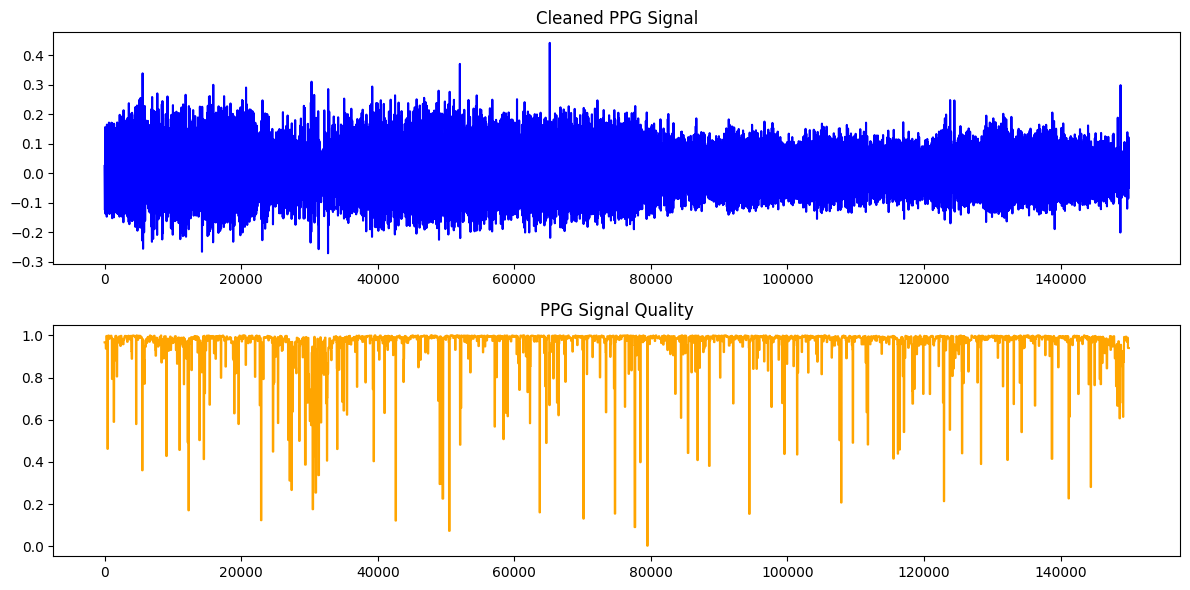

In [20]:
PPG_cleaned = signals["PPG_Clean"]
PPG_quality = signals["PPG_Quality"]
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(PPG_cleaned, color='blue')
plt.title('Cleaned PPG Signal')
plt.subplot(2, 1, 2)
plt.plot(PPG_quality, color='orange')
plt.title('PPG Signal Quality')
plt.tight_layout()
plt.show()

In [32]:
quality_threshold = 0.99

In [33]:
segments = []
segment_length = SAMPLING_RATE * 2
shift = 1
for start in range(0, len(PPG_cleaned) - segment_length, shift):
    segment = PPG_cleaned[start:start + segment_length]
    quality = PPG_quality[start:start + segment_length]
    if quality.min() >= quality_threshold:
        segments.append(segment)
        print(f"Extracted high-quality segment from {start} to {start + segment_length}")
        print(f"Mean quality of segment: {quality.mean()}")


Extracted high-quality segment from 2872 to 3122
Mean quality of segment: 0.9941204550206604
Extracted high-quality segment from 2873 to 3123
Mean quality of segment: 0.9941451191344043
Extracted high-quality segment from 2874 to 3124
Mean quality of segment: 0.9941697832481481
Extracted high-quality segment from 2875 to 3125
Mean quality of segment: 0.9941944473618919
Extracted high-quality segment from 2876 to 3126
Mean quality of segment: 0.9942191114756358
Extracted high-quality segment from 2877 to 3127
Mean quality of segment: 0.9942437755893795
Extracted high-quality segment from 2878 to 3128
Mean quality of segment: 0.9942684397031235
Extracted high-quality segment from 2879 to 3129
Mean quality of segment: 0.9942931038168672
Extracted high-quality segment from 2880 to 3130
Mean quality of segment: 0.994317767930611
Extracted high-quality segment from 2881 to 3131
Mean quality of segment: 0.9943424320443549
Extracted high-quality segment from 2882 to 3132
Mean quality of segmen

In [34]:
print(f"Number of high-quality segments extracted: {len(segments)}")

Number of high-quality segments extracted: 9853
